<a href="https://colab.research.google.com/github/ArnyWu/-Preview-AI-/blob/main/0919%E9%87%91%E8%9E%8D%E5%A4%A7%E6%95%B8%E6%93%9A%E4%BD%9C%E6%A5%AD01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2024-09-19 07:25:43--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.218.102, 172.217.218.100, 172.217.218.139, ...
Connecting to drive.google.com (drive.google.com)|172.217.218.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-09-19 07:25:43--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.127.132, 2a00:1450:4013:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.127.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  80.6MB/s    in 0.2s    

2024-09-19 



# 1.   Yahoo


# 資料收集

透過 yfinance 從 Yahoo 奇摩金融下載歷史股價資料

In [2]:
import yfinance as yf
import pandas as pd
from tabulate import tabulate

# 定義股票代號和日期範圍
ticker = '2603.TW'  # 長榮
start_date = '2021-01-01'
end_date = '2024-09-01'

# 下載股票資料
stock_data = yf.download(ticker, start=start_date, end=end_date)

# 顯示原始資料
print("原始資料:")
print(tabulate(stock_data.head(), headers='keys', tablefmt='pretty'))

[*********************100%***********************]  1 of 1 completed

原始資料:
+---------------------+---------+---------+---------+---------+--------------------+-------------+
|        Date         |  Open   |  High   |   Low   |  Close  |     Adj Close      |   Volume    |
+---------------------+---------+---------+---------+---------+--------------------+-------------+
| 2021-01-04 00:00:00 | 105.875 | 111.875 | 105.375 | 111.875 | 46.279884338378906 | 205450606.0 |
| 2021-01-05 00:00:00 |  112.5  | 113.75  | 107.875 | 113.75  | 47.05552291870117  | 213546933.0 |
| 2021-01-06 00:00:00 | 111.875 |  115.5  | 105.625 | 106.375 | 44.004669189453125 | 225659620.0 |
| 2021-01-07 00:00:00 | 108.25  |  109.5  |  95.75  | 96.125  | 39.764503479003906 | 310278912.0 |
| 2021-01-08 00:00:00 |  96.25  | 101.875 |  93.0   | 100.75  |  41.6777458190918  | 219431754.0 |
+---------------------+---------+---------+---------+---------+--------------------+-------------+


資料包含：

Open: 開盤價
High: 最高價
Low: 最低價
Close: 收盤價
Volume: 交易量

# 資料清理

檢查是否有缺失值

In [3]:
import pandas as pd
print(stock_data.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


檢查重複值

In [4]:
print(stock_data.duplicated().sum())

6


In [5]:
# 移除重複的資料
stock_data = stock_data.drop_duplicates()

print(stock_data.duplicated().sum())

0


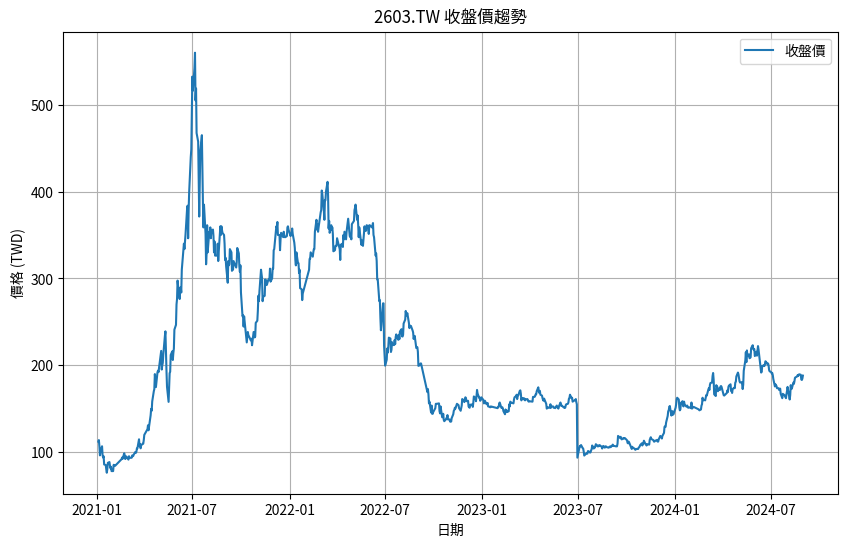

In [6]:
import matplotlib.pyplot as plt

# 畫收盤價的趨勢圖
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='收盤價')
plt.title(f'{ticker} 收盤價趨勢')
plt.xlabel('日期')
plt.ylabel('價格 (TWD)')
plt.legend()
plt.grid(True)
plt.show()

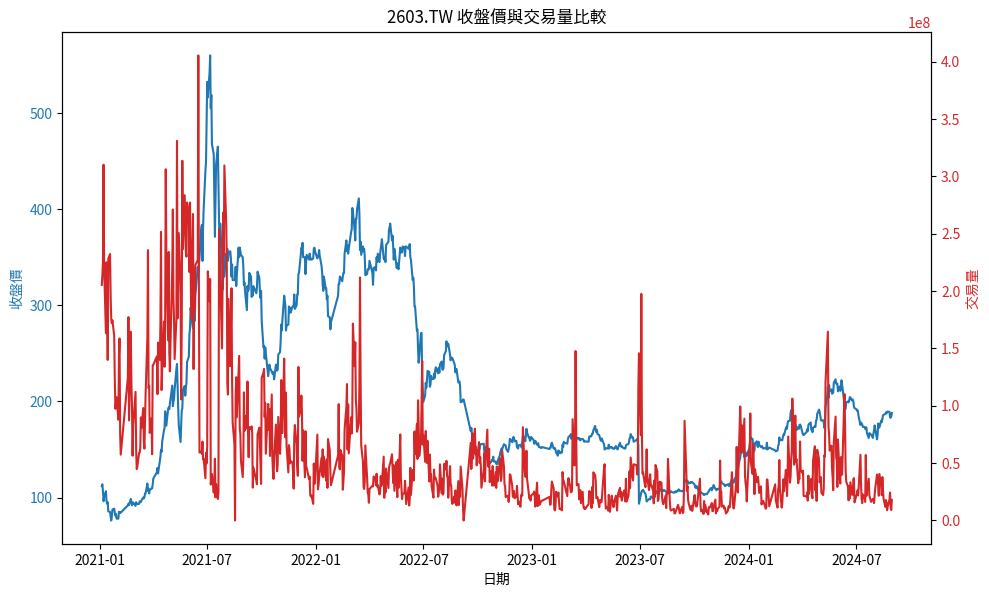

In [7]:
# 畫出收盤價和交易量的比較圖
fig, ax1 = plt.subplots(figsize=(10, 6))

# 收盤價
ax1.set_xlabel('日期')
ax1.set_ylabel('收盤價', color='tab:blue')
ax1.plot(stock_data.index, stock_data['Close'], color='tab:blue', label='收盤價')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 建立第二個 Y 軸，共享 X 軸
ax2 = ax1.twinx()
ax2.set_ylabel('交易量', color='tab:red')
ax2.plot(stock_data.index, stock_data['Volume'], color='tab:red', label='交易量')
ax2.tick_params(axis='y', labelcolor='tab:red')

# 加入圖例
fig.tight_layout()
plt.title(f'{ticker} 收盤價與交易量比較')
plt.show()

# 2.   證卷交易所

In [8]:
!pip install requests beautifulsoup4

台灣證券交易所提供股價資料的 API，可以直接透過特定 URL 獲取每日交易資料。這裡以爬取某個股票代號的日交易資料為例。

In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# 設定股票代號與日期（日期格式: yyyyMMdd）
stock_code = '2603'  # 長榮
date = '20240918'  # 要抓取的日期

# 建立目標 URL（台灣證券交易所的股價 API）
url = f'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date={date}&stockNo={stock_code}'

# 發送請求並取得回應
response = requests.get(url)
data = response.json()

# 檢查回應狀態
if response.status_code == 200 and 'data' in data:
    # 將資料轉換為 DataFrame
    df = pd.DataFrame(data['data'], columns=data['fields'])
    # 顯示資料（使用 tabulate 庫）
    print("股價資料:")
    print(tabulate(df.head(), headers='keys', tablefmt='pretty'))
else:
    print('無法取得資料或查無資料')

股價資料:
+---+-----------+------------+---------------+--------+--------+--------+--------+----------+----------+
|   |   日期    |  成交股數  |   成交金額    | 開盤價 | 最高價 | 最低價 | 收盤價 | 漲跌價差 | 成交筆數 |
+---+-----------+------------+---------------+--------+--------+--------+--------+----------+----------+
| 0 | 113/09/02 | 22,437,569 | 4,111,548,890 | 188.00 | 188.00 | 181.00 | 182.00 |  -6.00   |  18,685  |
| 1 | 113/09/03 | 9,615,815  | 1,758,934,122 | 182.00 | 184.00 | 182.00 | 182.00 |   0.00   |  7,312   |
| 2 | 113/09/04 | 23,714,174 | 4,201,809,293 | 176.50 | 180.50 | 173.00 | 178.50 |  -3.50   |  17,431  |
| 3 | 113/09/05 | 11,844,442 | 2,138,568,539 | 180.00 | 182.00 | 178.50 | 181.00 |  +2.50   |  7,431   |
| 4 | 113/09/06 | 10,025,417 | 1,803,494,817 | 180.00 | 181.50 | 178.00 | 180.00 |  -1.00   |  5,840   |
+---+-----------+------------+---------------+--------+--------+--------+--------+----------+----------+


這裡的 url 是台灣證券交易所提供的 API，可以指定股票代號和日期來查詢當天的交易資料。你會取得一個 JSON 格式的回應，其中包含欄位和數據。

範例中的 data['fields'] 是每一列的名稱，data['data'] 是具體的交易資料。透過 pandas，我們可以將資料轉換成易於操作的 DataFrame 格式。

In [10]:
# 定義一個函數將民國年轉換為西元年
def convert_to_western_year(date_str):
    parts = date_str.split('/')
    if len(parts) == 3:
        # 將年份部分轉換為西元年
        parts[0] = str(int(parts[0]) + 1911)
        # 重新組合日期字串
        return '/'.join(parts)
    return date_str

# 使用 apply 函數將日期欄位中的民國年轉換為西元年
df['日期'] = df['日期'].apply(convert_to_western_year)

# 再將日期欄位轉換為日期格式
df['日期'] = pd.to_datetime(df['日期'], format='%Y/%m/%d')

# 顯示轉換後的資料（使用 tabulate 庫）
print("\n轉換後的資料:")
print(tabulate(df.head(), headers='keys', tablefmt='pretty'))


轉換後的資料:
+---+---------------------+------------+---------------+--------+--------+--------+--------+----------+----------+
|   |        日期         |  成交股數  |   成交金額    | 開盤價 | 最高價 | 最低價 | 收盤價 | 漲跌價差 | 成交筆數 |
+---+---------------------+------------+---------------+--------+--------+--------+--------+----------+----------+
| 0 | 2024-09-02 00:00:00 | 22,437,569 | 4,111,548,890 | 188.00 | 188.00 | 181.00 | 182.00 |  -6.00   |  18,685  |
| 1 | 2024-09-03 00:00:00 | 9,615,815  | 1,758,934,122 | 182.00 | 184.00 | 182.00 | 182.00 |   0.00   |  7,312   |
| 2 | 2024-09-04 00:00:00 | 23,714,174 | 4,201,809,293 | 176.50 | 180.50 | 173.00 | 178.50 |  -3.50   |  17,431  |
| 3 | 2024-09-05 00:00:00 | 11,844,442 | 2,138,568,539 | 180.00 | 182.00 | 178.50 | 181.00 |  +2.50   |  7,431   |
| 4 | 2024-09-06 00:00:00 | 10,025,417 | 1,803,494,817 | 180.00 | 181.50 | 178.00 | 180.00 |  -1.00   |  5,840   |
+---+---------------------+------------+---------------+--------+--------+--------+--------+---------

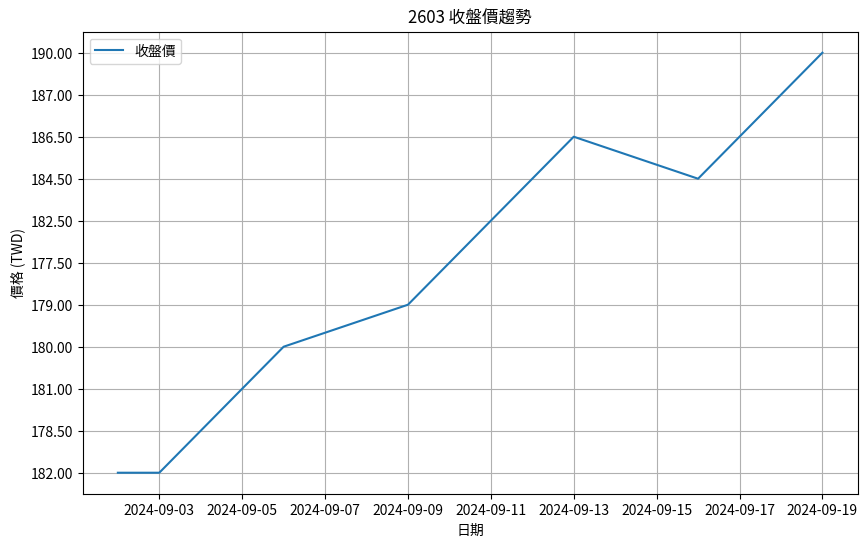

In [11]:
import matplotlib.pyplot as plt

# 繪製收盤價趨勢圖
plt.figure(figsize=(10, 6))
plt.plot(df['日期'], df['收盤價'], label='收盤價')
plt.xlabel('日期')
plt.ylabel('價格 (TWD)')
plt.title(f'{stock_code} 收盤價趨勢')
plt.legend()
plt.grid(True)
plt.show()